### Importación de datos



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##1 Análisis de facturación

/tmp/ipython-input-100774980.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


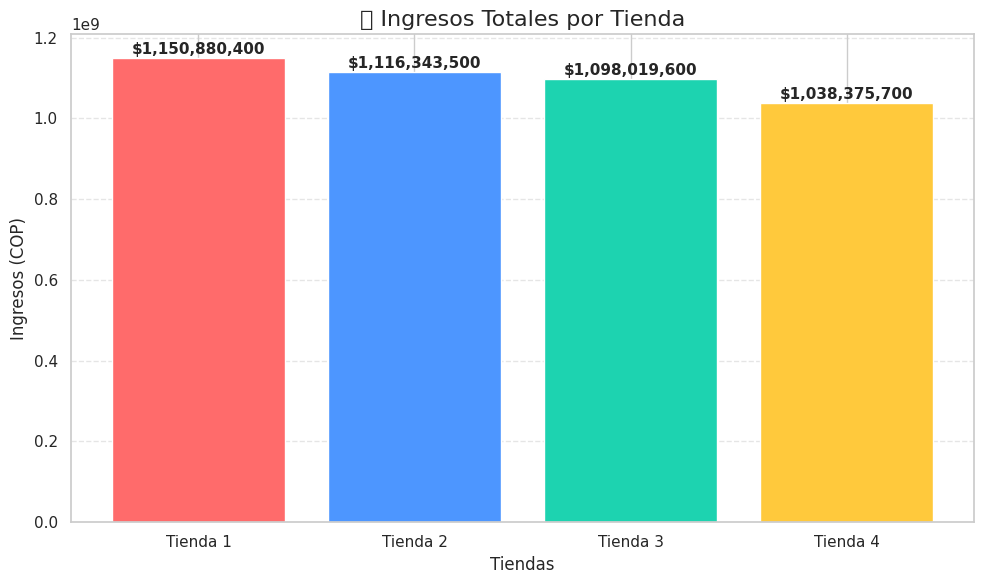

In [56]:
# Crear DataFrames por tienda
df_tienda1 = pd.DataFrame(tienda)
df_tienda2 = pd.DataFrame(tienda2)
df_tienda3 = pd.DataFrame(tienda3)
df_tienda4 = pd.DataFrame(tienda4)

# Calcular ingresos por tienda (suma de la columna 'Precio')
total_ingreso_t1 = df_tienda1['Precio'].sum()
total_ingreso_t2 = df_tienda2['Precio'].sum()
total_ingreso_t3 = df_tienda3['Precio'].sum()
total_ingreso_t4 = df_tienda4['Precio'].sum()

# Crear DataFrame resumen
ingresos_tiendas = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos': [total_ingreso_t1, total_ingreso_t2, total_ingreso_t3, total_ingreso_t4]
}

df_ingresos = pd.DataFrame(ingresos_tiendas)

# Visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Colores personalizados por barra
colores = ['#FF6B6B', '#4D96FF', '#1DD3B0', '#FFC93C']

# Crear gráfico de barras
barras = ax.bar(df_ingresos['Tienda'], df_ingresos['Ingresos'], color=colores)

# Añadir etiquetas encima de cada barra con separador de miles
for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura + 2e6, f"${int(altura):,}",
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Títulos y etiquetas
ax.set_title('📈 Ingresos Totales por Tienda', fontsize=16)
ax.set_ylabel('Ingresos (COP)', fontsize=12)
ax.set_xlabel('Tiendas', fontsize=12)
ax.tick_params(axis='both', labelsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

##2 Ventas por categoría

In [30]:
# Cantidad de productos vendidos por categoría en cada tienda
ventas_por_categoria_t1 = tienda["Categoría del Producto"].value_counts()
ventas_por_categoria_t2 = tienda2["Categoría del Producto"].value_counts()
ventas_por_categoria_t3 = tienda3["Categoría del Producto"].value_counts()
ventas_por_categoria_t4 = tienda4["Categoría del Producto"].value_counts()

# Mostramos los resultados
print("📊 Productos vendidos por categoría - Tienda 1:")
print(ventas_por_categoria_t1)
print("\n📊 Productos vendidos por categoría - Tienda 2:")
print(ventas_por_categoria_t2)
print("\n📊 Productos vendidos por categoría - Tienda 3:")
print(ventas_por_categoria_t3)
print("\n📊 Productos vendidos por categoría - Tienda 4:")
print(ventas_por_categoria_t4)

📊 Productos vendidos por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

📊 Productos vendidos por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

📊 Productos vendidos por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar

/tmp/ipython-input-2168359742.py:37: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


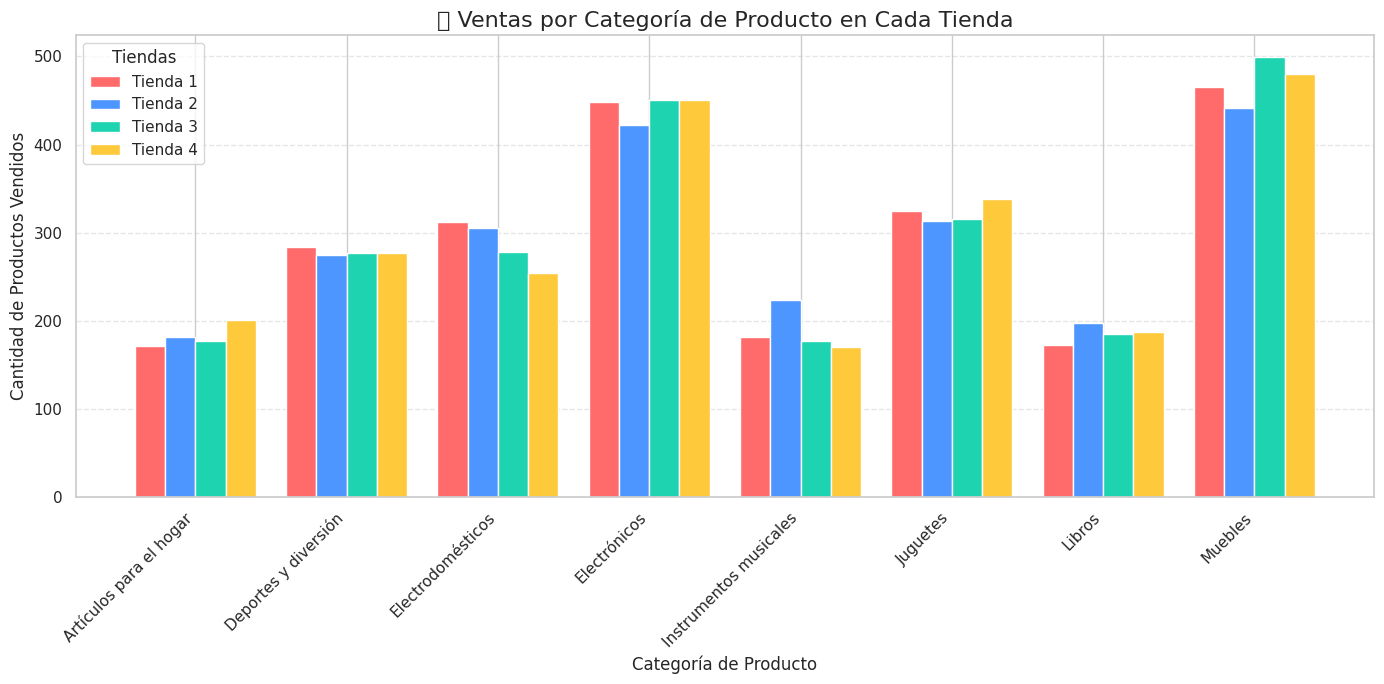

In [59]:
# Paso 1: Contar ventas por categoría por tienda
ventas_por_categoria_t1 = tienda["Categoría del Producto"].value_counts()
ventas_por_categoria_t2 = tienda2["Categoría del Producto"].value_counts()
ventas_por_categoria_t3 = tienda3["Categoría del Producto"].value_counts()
ventas_por_categoria_t4 = tienda4["Categoría del Producto"].value_counts()

# Paso 2: Unir todos en un solo DataFrame
df_ventas_categoria = pd.DataFrame({
    'Tienda 1': ventas_por_categoria_t1,
    'Tienda 2': ventas_por_categoria_t2,
    'Tienda 3': ventas_por_categoria_t3,
    'Tienda 4': ventas_por_categoria_t4
}).fillna(0).astype(int)

# Paso 3: Graficar
categorias = df_ventas_categoria.index
ancho_barra = 0.2
x = range(len(categorias))

fig, ax = plt.subplots(figsize=(14, 7))

# Posiciones desplazadas para barras agrupadas
ax.bar([i - 1.5 * ancho_barra for i in x], df_ventas_categoria['Tienda 1'], width=ancho_barra, label='Tienda 1', color='#FF6B6B')
ax.bar([i - 0.5 * ancho_barra for i in x], df_ventas_categoria['Tienda 2'], width=ancho_barra, label='Tienda 2', color='#4D96FF')
ax.bar([i + 0.5 * ancho_barra for i in x], df_ventas_categoria['Tienda 3'], width=ancho_barra, label='Tienda 3', color='#1DD3B0')
ax.bar([i + 1.5 * ancho_barra for i in x], df_ventas_categoria['Tienda 4'], width=ancho_barra, label='Tienda 4', color='#FFC93C')

# Etiquetas y estilo
ax.set_title('📦 Ventas por Categoría de Producto en Cada Tienda', fontsize=16)
ax.set_ylabel('Cantidad de Productos Vendidos', fontsize=12)
ax.set_xlabel('Categoría de Producto', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend(title='Tiendas')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda